<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

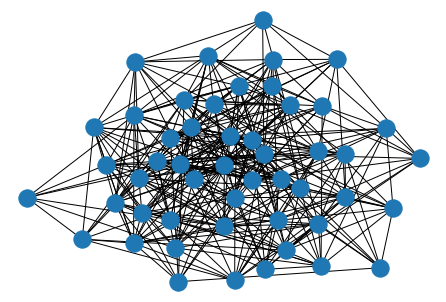

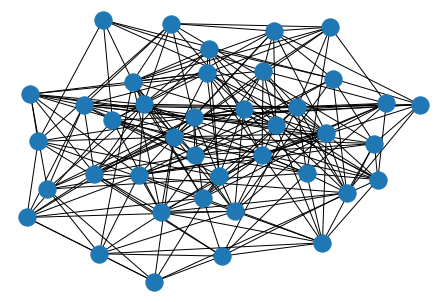

In [1]:
#Erdos-Renyi Graph in Networkx
import numpy as np
from statistics import mean
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities
T  = K/5 #Number of test available
PAS = 0.7 #Probability of Asymptomatic
PS = 1 - PAS #Probability of Not Asymptomatic


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 1 0 ... 0 1 1]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 1 0 1]
 [1 0 0 ... 0 1 0]]
[[0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 1 0]
 [0 1 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
    Node[i*NN+j].append({'ISOLATED' : 0})
print(Node)
print(len(Node))


{0: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED': 0}], 1: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED': 0}], 2: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED': 0}], 3: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED': 0}], 4: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED': 0}], 5: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED': 0}], 6: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED': 0}], 7: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED': 0}], 8: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED': 0}], 9: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED': 0}], 10: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED': 0}], 11: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED': 0}], 12: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED': 0}], 13: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED': 0}], 1

In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1

  Symptom = random.choices([0,1],weights=(PAS,PS), k=1)[0]
  Isolate = 0

  Agent[k].append({'Symptom' : Symptom, 'Isolate' : Isolate})
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state,Symptom,Isolate]})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state,Symptom,Isolate], 'C' : 0})
    Agent[k].append({'State' : Rand_state, 'C' : 0 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state]})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
print(Node)
print(Agent)

{0: [{'Viral_load': 0}, {'S': 5}, {'I': 0}, {'R': 0}, {'ISOLATED': 0}, {158: [0, 0, 0]}, {806: [0, 0, 0]}, {2785: [0, 0, 0]}, {2940: [0, 0, 0]}, {8063: [0, 0, 0]}], 1: [{'Viral_load': 0}, {'S': 4}, {'I': 0}, {'R': 0}, {'ISOLATED': 0}, {36: [0, 0, 0]}, {4370: [0, 0, 0]}, {5696: [0, 0, 0]}, {6443: [0, 0, 0]}], 2: [{'Viral_load': 0}, {'S': 5}, {'I': 0}, {'R': 0}, {'ISOLATED': 0}, {2862: [0, 1, 0]}, {3336: [0, 1, 0]}, {4714: [0, 0, 0]}, {9499: [0, 1, 0]}, {9698: [0, 0, 0]}], 3: [{'Viral_load': 0}, {'S': 2}, {'I': 0}, {'R': 0}, {'ISOLATED': 0}, {6321: [0, 0, 0]}, {8855: [0, 0, 0]}], 4: [{'Viral_load': 0}, {'S': 8}, {'I': 0}, {'R': 0}, {'ISOLATED': 0}, {847: [0, 0, 0]}, {3418: [0, 1, 0]}, {3635: [0, 1, 0]}, {4439: [0, 0, 0]}, {4523: [0, 1, 0]}, {5061: [0, 1, 0]}, {5524: [0, 0, 0]}, {7130: [0, 0, 0]}], 5: [{'Viral_load': 0}, {'S': 5}, {'I': 0}, {'R': 0}, {'ISOLATED': 0}, {6226: [0, 1, 0]}, {7170: [0, 0, 0]}, {7826: [0, 1, 0]}, {8299: [0, 1, 0]}, {8966: [0, 1, 0]}], 6: [{'Viral_load': 0}, {'S'

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load']*.5)})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'ISOLATED' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(5,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][2]['Home_node'])
                  neighbors.append(Agent_next[a_id][4]['First_node'])
                  neighbors.append(Agent_next[a_id][6]['Second_node'])

                  if len(neighbors) > 0:  
                      I1=(Node[Agent_next[a_id][5]['First_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][5]['First_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][5]['First_nodeN'][2]][2]['I'])
                      I2=(Node[Agent_next[a_id][7]['Second_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][7]['Second_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][7]['Second_nodeN'][2]][2]['I'])
                      IH=(Node[Agent_next[a_id][3]['Home_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][3]['Home_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][3]['Home_nodeN'][2]][2]['I'])
                      V1 = (Node[Agent_next[a_id][5]['First_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][5]['First_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][5]['First_nodeN'][2]][0]['Viral_load'])
                      V2 = (Node[Agent_next[a_id][7]['Second_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][7]['Second_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][7]['Second_nodeN'][2]][0]['Viral_load'])
                      VH = (Node[Agent_next[a_id][3]['Home_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][3]['Home_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][3]['Home_nodeN'][2]][0]['Viral_load'])
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      PH = IH/(IH**2 + .01) + VH/(VH**2+.01)
                      if max(P1,P2,PH) == PH:
                        PH = 3*PH
                        P1 = P1/3
                        P2 = P2/3
                      elif max(P1,P2,PH) == P1:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      else:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      P = P1 + P2 + PH                      
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1 = PH/P 
                        PNN2 = P1/P
                        PNN3 = P2/P 
                      #next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      next = random.choices(neighbors,weights=(.95,.025,.025), k=1)[0]
                      if next == Agent_next[a_id][8]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][4]['First_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][4]['First_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][5]['First_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][5]['First_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][5]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][6]['Second_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][6]['Second_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][7]['Second_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][7]['Second_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][7]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][2]['Home_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][2]['Home_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][3]['Home_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][3]['Home_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][3]['Home_nodeN'][2]
                          count_stay_home+=1
                      I2 = Node[Agent_next[a_id][9]['Current_nodeN'][1]][2]['I']
                      I3 = Node[Agent_next[a_id][9]['Current_nodeN'][2]][2]['I']
                      I1 = Node[Agent_next[a_id][9]['Current_nodeN'][0]][2]['I']
                      V2 = Node[Agent_next[a_id][9]['Current_nodeN'][1]][0]['Viral_load']
                      V3 = Node[Agent_next[a_id][9]['Current_nodeN'][2]][0]['Viral_load']
                      V1 = Node[Agent_next[a_id][9]['Current_nodeN'][0]][0]['Viral_load']
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      P3 = I3/(I3**2 + .01) + V3/(V3**2+.01)
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      if max(P1,P2,P3) == P1:
                        P1 = 3*P1
                        P2 = P2
                        P3 = P3
                      elif max(P1,P2,P3) == P2:
                        P1 = 3*P1
                        P2 = 2*P2
                        P3 = P1
                      else:
                        P1 = 3*P1
                        P2 = P2
                        P3 = 2*P3
                      P = P1+P2+P3
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1=P1/P
                        PNN2=P2/P
                        PNN3=P3/P
                       
                      #nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      nextn = random.choices(Agent_next[a_id][9]['Current_nodeN'],weights=(.90,.05,.05),k=1)[0]                    
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id][0] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id][0] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['C']+=1
            #if nex != cur:
            #  Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id][0] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        Total = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] + 1
        W1 = (Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load'])/Total
        W2 = (Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1)/Total
        for agent in list(range(5,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'C' : 0})
              Agent_next[a_id][1]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['C'] == 4:   #Time-steps of 4 to get cured(I -> R)
              Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = 2
              count_IR+=1
              Agent_next[a_id][1]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('C') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  count_ISOLATED=0
  total_V=0.0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
    count_ISOLATED+=Node[i][4]['ISOLATED']
    total_V+=Node[i][0]['Viral_load']
  return count_S,count_I,count_R,count_ISOLATED,total_V

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][1]['State'] == 0:
      count_S+=1
    elif Agent[i][1]['State'] == 1:
      count_I+=1
    elif Agent[i][1]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9794, 9595, 9297, 8850, 8224, 7500, 6609, 5592, 4503, 3446, 2414, 1626, 1108, 747, 517, 379, 308, 251, 219, 201, 186, 180, 176, 171, 168, 164, 161, 160, 160, 160, 160, 160]
[206, 405, 703, 1150, 1570, 2095, 2688, 3258, 3721, 4054, 4195, 3966, 3395, 2699, 1897, 1247, 800, 496, 298, 178, 122, 71, 43, 30, 18, 16, 15, 11, 8, 4, 1, 0]
[0, 0, 0, 0, 206, 405, 703, 1150, 1776, 2500, 3391, 4408, 5497, 6554, 7586, 8374, 8892, 9253, 9483, 9621, 9692, 9749, 9781, 9799, 9814, 9820, 9824, 9829, 9832, 9836, 9839, 9840]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9794, 9595, 9297, 8850, 8224, 7500, 6609, 5592, 4503, 3446, 2414, 1626, 1108, 747, 517, 379, 308, 251, 219, 201, 186, 180, 176, 171, 168, 164, 161, 160, 160, 160, 160, 160]]
[[], [206, 405, 703, 1150, 1570, 2095, 2688, 3258, 3721, 4054, 4195, 3966, 3395, 2699, 1897, 1247, 800, 496, 298, 178, 122, 71, 43, 30, 18, 16, 15, 

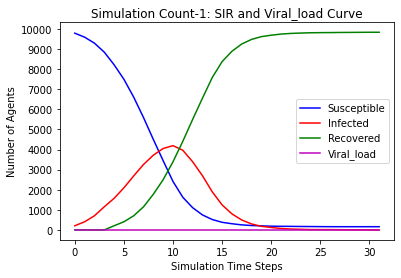

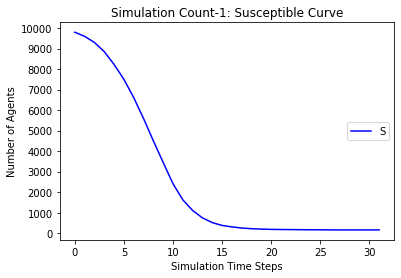

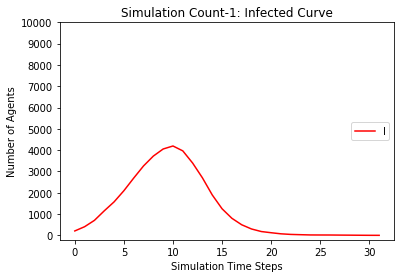

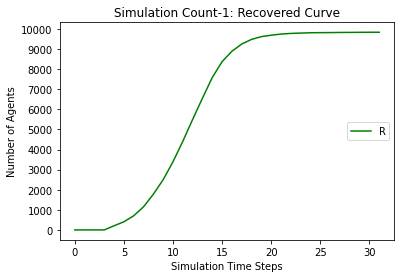

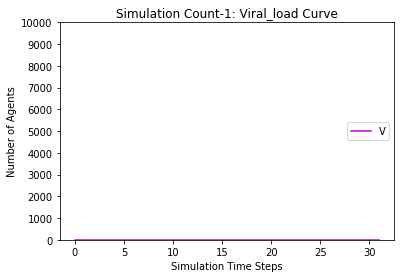

[9794, 9591, 9258, 8809, 8221, 7513, 6663, 5704, 4677, 3665, 2723, 1905, 1298, 883, 605, 437, 335, 264, 234, 212, 192, 185, 179, 173, 169, 169, 167, 167, 167, 167, 167]
[206, 409, 742, 1191, 1573, 2078, 2595, 3105, 3544, 3848, 3940, 3799, 3379, 2782, 2118, 1468, 963, 619, 371, 225, 143, 79, 55, 39, 23, 16, 12, 6, 2, 2, 0]
[0, 0, 0, 0, 206, 409, 742, 1191, 1779, 2487, 3337, 4296, 5323, 6335, 7277, 8095, 8702, 9117, 9395, 9563, 9665, 9736, 9766, 9788, 9808, 9815, 9821, 9827, 9831, 9831, 9833]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9794, 9595, 9297, 8850, 8224, 7500, 6609, 5592, 4503, 3446, 2414, 1626, 1108, 747, 517, 379, 308, 251, 219, 201, 186, 180, 176, 171, 168, 164, 161, 160, 160, 160, 160, 160], [9794, 9591, 9258, 8809, 8221, 7513, 6663, 5704, 4677, 3665, 2723, 1905, 1298, 883, 605, 437, 335, 264, 234, 212, 192, 185, 179, 173, 169, 169, 167, 167, 167, 167, 167]

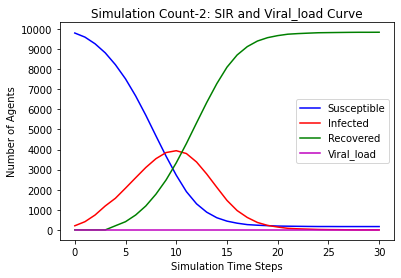

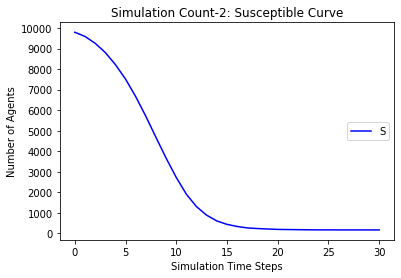

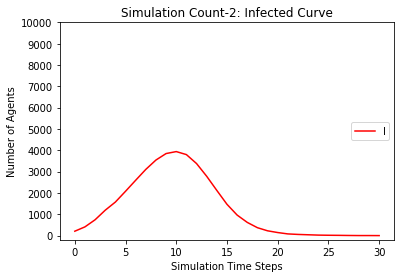

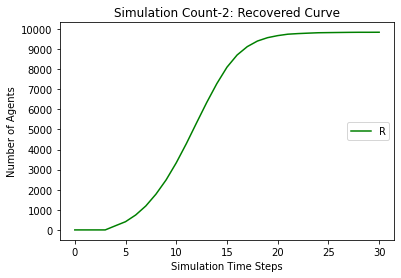

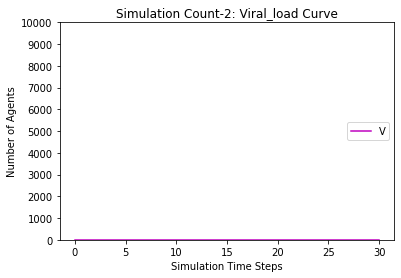

[9794, 9604, 9295, 8835, 8219, 7483, 6589, 5568, 4490, 3440, 2503, 1748, 1146, 717, 487, 339, 273, 238, 218, 204, 198, 187, 182, 178, 176, 175, 175, 175, 175, 175]
[206, 396, 705, 1165, 1575, 2121, 2706, 3267, 3729, 4043, 4086, 3820, 3344, 2723, 2016, 1409, 873, 479, 269, 135, 75, 51, 36, 26, 22, 12, 7, 3, 1, 0]
[0, 0, 0, 0, 206, 396, 705, 1165, 1781, 2517, 3411, 4432, 5510, 6560, 7497, 8252, 8854, 9283, 9513, 9661, 9727, 9762, 9782, 9796, 9802, 9813, 9818, 9822, 9824, 9825]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9794, 9595, 9297, 8850, 8224, 7500, 6609, 5592, 4503, 3446, 2414, 1626, 1108, 747, 517, 379, 308, 251, 219, 201, 186, 180, 176, 171, 168, 164, 161, 160, 160, 160, 160, 160], [9794, 9591, 9258, 8809, 8221, 7513, 6663, 5704, 4677, 3665, 2723, 1905, 1298, 883, 605, 437, 335, 264, 234, 212, 192, 185, 179, 173, 169, 169, 167, 167, 167, 167, 167], [9794, 9604, 9295, 

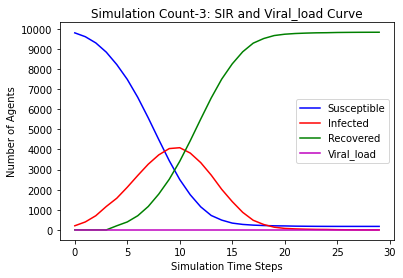

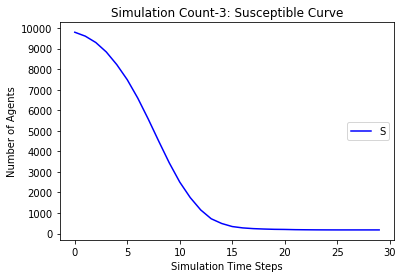

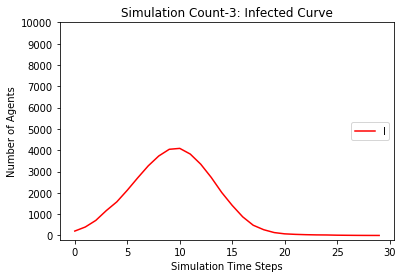

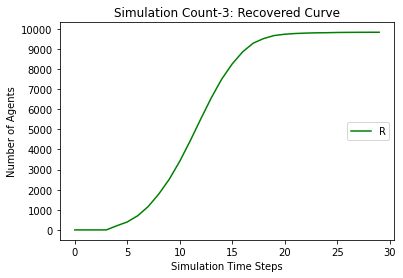

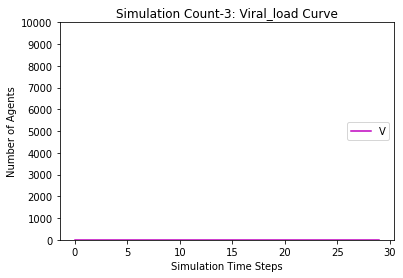

[9794, 9605, 9293, 8849, 8270, 7607, 6768, 5855, 4820, 3769, 2732, 1884, 1281, 854, 553, 367, 253, 191, 152, 131, 130, 123, 119, 119, 119, 119, 119]
[206, 395, 707, 1151, 1524, 1998, 2525, 2994, 3450, 3838, 4036, 3971, 3539, 2915, 2179, 1517, 1028, 663, 401, 236, 123, 68, 33, 12, 11, 4, 0]
[0, 0, 0, 0, 206, 395, 707, 1151, 1730, 2393, 3232, 4145, 5180, 6231, 7268, 8116, 8719, 9146, 9447, 9633, 9747, 9809, 9848, 9869, 9870, 9877, 9881]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9794, 9595, 9297, 8850, 8224, 7500, 6609, 5592, 4503, 3446, 2414, 1626, 1108, 747, 517, 379, 308, 251, 219, 201, 186, 180, 176, 171, 168, 164, 161, 160, 160, 160, 160, 160], [9794, 9591, 9258, 8809, 8221, 7513, 6663, 5704, 4677, 3665, 2723, 1905, 1298, 883, 605, 437, 335, 264, 234, 212, 192, 185, 179, 173, 169, 169, 167, 167, 167, 167, 167], [9794, 9604, 9295, 8835, 8219, 7483, 6589, 5568, 4490, 3440, 2503, 1748, 11

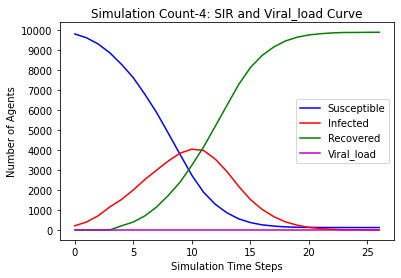

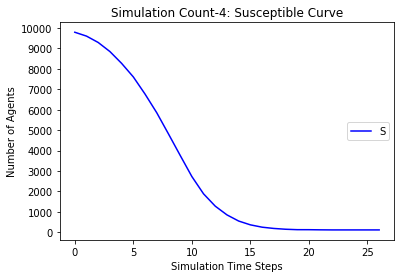

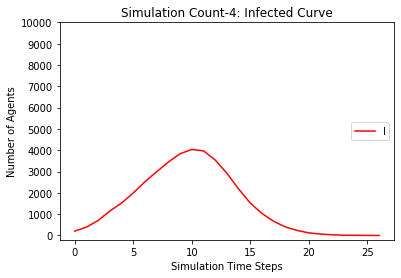

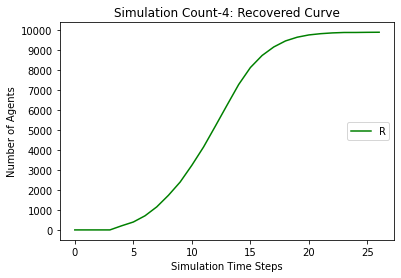

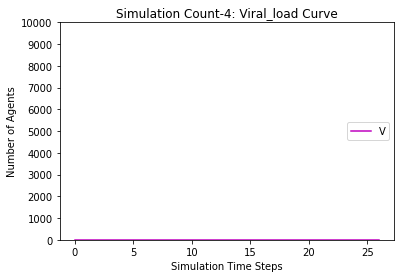

[9794, 9600, 9279, 8797, 8148, 7374, 6437, 5322, 4148, 3128, 2204, 1519, 1008, 663, 445, 322, 256, 221, 199, 186, 178, 174, 172, 168, 167, 167, 166, 166, 166, 166, 166]
[206, 400, 721, 1203, 1646, 2226, 2842, 3475, 4000, 4246, 4233, 3803, 3140, 2465, 1759, 1197, 752, 442, 246, 136, 78, 47, 27, 18, 11, 7, 6, 2, 1, 1, 0]
[0, 0, 0, 0, 206, 400, 721, 1203, 1852, 2626, 3563, 4678, 5852, 6872, 7796, 8481, 8992, 9337, 9555, 9678, 9744, 9779, 9801, 9814, 9822, 9826, 9828, 9832, 9833, 9833, 9834]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9794, 9595, 9297, 8850, 8224, 7500, 6609, 5592, 4503, 3446, 2414, 1626, 1108, 747, 517, 379, 308, 251, 219, 201, 186, 180, 176, 171, 168, 164, 161, 160, 160, 160, 160, 160], [9794, 9591, 9258, 8809, 8221, 7513, 6663, 5704, 4677, 3665, 2723, 1905, 1298, 883, 605, 437, 335, 264, 234, 212, 192, 185, 179, 173, 169, 169, 167, 167, 167, 167, 167], [

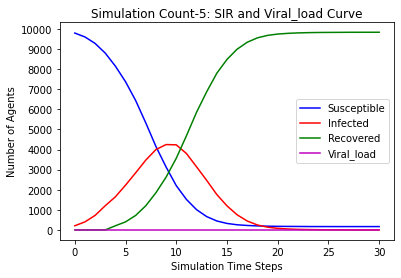

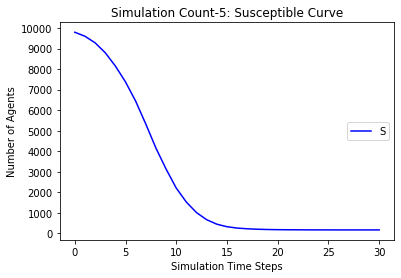

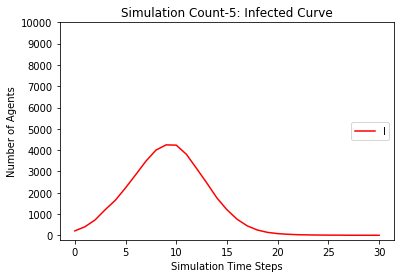

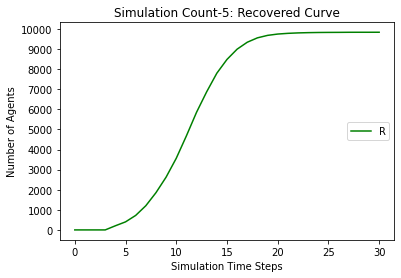

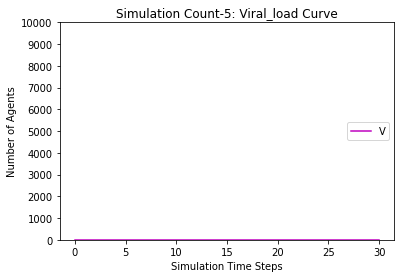

[9794, 9585, 9251, 8810, 8207, 7475, 6521, 5459, 4335, 3238, 2279, 1584, 1039, 681, 456, 341, 270, 226, 198, 180, 167, 158, 155, 151, 150, 148, 145, 144, 144, 144, 144, 144]
[206, 415, 749, 1190, 1587, 2110, 2730, 3351, 3872, 4237, 4242, 3875, 3296, 2557, 1823, 1243, 769, 455, 258, 161, 103, 68, 43, 29, 17, 10, 10, 7, 6, 4, 1, 0]
[0, 0, 0, 0, 206, 415, 749, 1190, 1793, 2525, 3479, 4541, 5665, 6762, 7721, 8416, 8961, 9319, 9544, 9659, 9730, 9774, 9802, 9820, 9833, 9842, 9845, 9849, 9850, 9852, 9855, 9856]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9794, 9595, 9297, 8850, 8224, 7500, 6609, 5592, 4503, 3446, 2414, 1626, 1108, 747, 517, 379, 308, 251, 219, 201, 186, 180, 176, 171, 168, 164, 161, 160, 160, 160, 160, 160], [9794, 9591, 9258, 8809, 8221, 7513, 6663, 5704, 4677, 3665, 2723, 1905, 1298, 883, 605, 437, 335, 264, 234, 212, 192, 185, 179, 173, 169, 169, 167, 

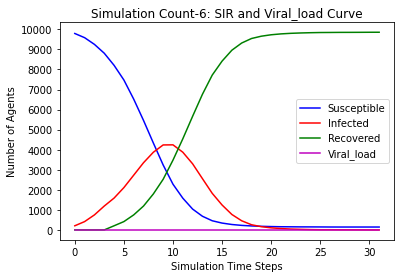

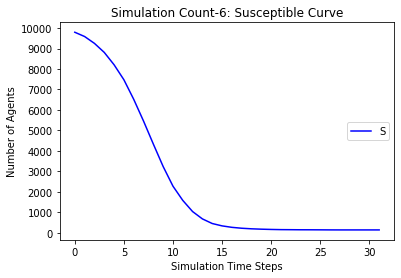

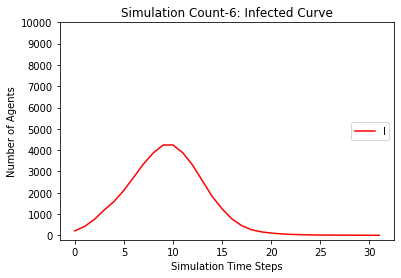

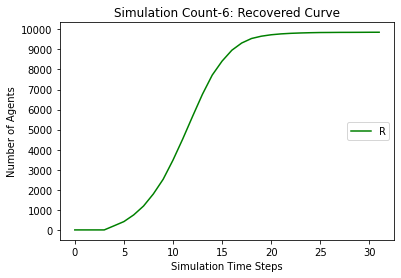

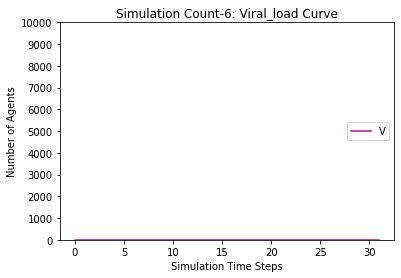

[9794, 9601, 9292, 8831, 8221, 7523, 6676, 5657, 4599, 3574, 2603, 1814, 1252, 835, 570, 413, 323, 262, 223, 196, 178, 170, 166, 163, 162, 162, 162, 162, 162]
[206, 399, 708, 1169, 1573, 2078, 2616, 3174, 3622, 3949, 4073, 3843, 3347, 2739, 2033, 1401, 929, 573, 347, 217, 145, 92, 57, 33, 16, 8, 4, 1, 0]
[0, 0, 0, 0, 206, 399, 708, 1169, 1779, 2477, 3324, 4343, 5401, 6426, 7397, 8186, 8748, 9165, 9430, 9587, 9677, 9738, 9777, 9804, 9822, 9830, 9834, 9837, 9838]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9794, 9595, 9297, 8850, 8224, 7500, 6609, 5592, 4503, 3446, 2414, 1626, 1108, 747, 517, 379, 308, 251, 219, 201, 186, 180, 176, 171, 168, 164, 161, 160, 160, 160, 160, 160], [9794, 9591, 9258, 8809, 8221, 7513, 6663, 5704, 4677, 3665, 2723, 1905, 1298, 883, 605, 437, 335, 264, 234, 212, 192, 185, 179, 173, 169, 169, 167, 167, 167, 167, 167], [9794, 9604, 9295, 8835, 8219, 7483, 6

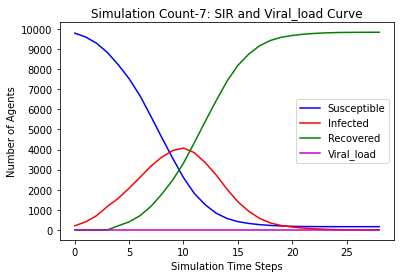

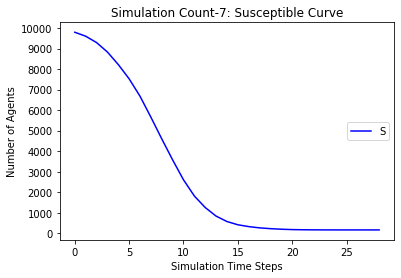

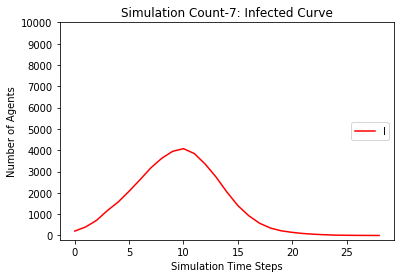

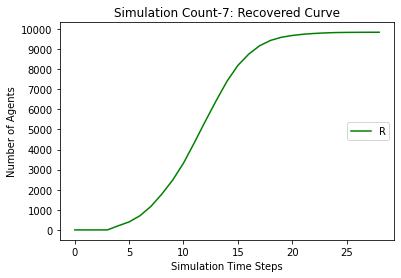

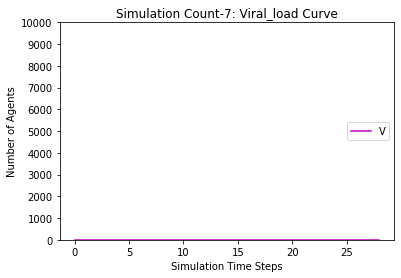

[9794, 9593, 9277, 8814, 8185, 7402, 6420, 5307, 4187, 3094, 2132, 1431, 956, 655, 471, 351, 266, 216, 186, 172, 166, 160, 156, 156, 154, 153, 152, 150, 150, 149, 149, 149, 149, 149]
[206, 407, 723, 1186, 1609, 2191, 2857, 3507, 3998, 4308, 4288, 3876, 3231, 2439, 1661, 1080, 690, 439, 285, 179, 100, 56, 30, 16, 12, 7, 4, 6, 4, 4, 3, 1, 1, 0]
[0, 0, 0, 0, 206, 407, 723, 1186, 1815, 2598, 3580, 4693, 5813, 6906, 7868, 8569, 9044, 9345, 9529, 9649, 9734, 9784, 9814, 9828, 9834, 9840, 9844, 9844, 9846, 9847, 9848, 9850, 9850, 9851]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9794, 9595, 9297, 8850, 8224, 7500, 6609, 5592, 4503, 3446, 2414, 1626, 1108, 747, 517, 379, 308, 251, 219, 201, 186, 180, 176, 171, 168, 164, 161, 160, 160, 160, 160, 160], [9794, 9591, 9258, 8809, 8221, 7513, 6663, 5704, 4677, 3665, 2723, 1905, 1298, 883, 605, 437, 335, 264, 234, 212, 

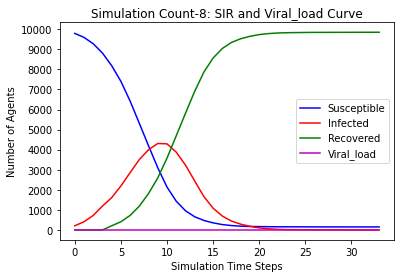

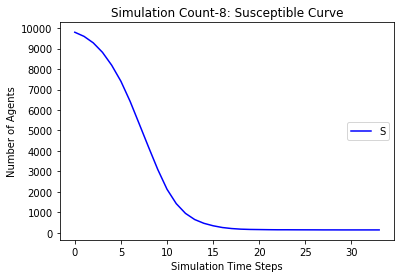

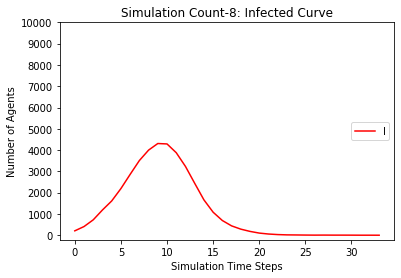

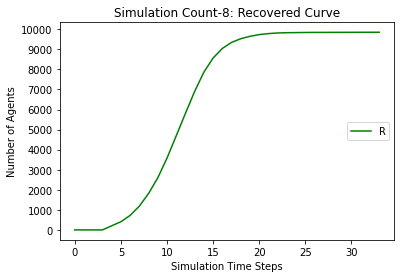

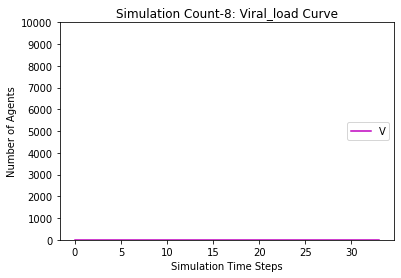

In [ ]:
SS,II,RR,VV,TT = [[]],[[]],[[]],[[]],[[]]
for i in range(10):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj,ISOLATEDj,Vj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,V,T = [],[],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  V.append(Vj)
  T.append(j)

  while Ij > 0 or Vj >= 1 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj,ISOLATEDj,Vj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    V.append(Vj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  print(V)
  SS.append(S)
  II.append(I)
  RR.append(R)
  VV.append(V)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  print(VV)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g',T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': SIR and Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Susceptible Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Infected Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Recovered Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

  plt.plot(T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Viral_load"),loc='center right')
  plt.show()  

In [ ]:
SC = SS[1]
IC = II[1]
RC = RR[1]
VT = VV[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  VT = [mean(i) for i in zip(VT,VV[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

print("Susceptible Average (100 Simulations):", SC)
print("Infected Average(100 Simulations):", IC)
print("Recovered Average(100 Simulations):", RC)
print("Viral_load Average(100 Simulations):", VT) 
print("Time Steps:", TC) 



plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g', TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: SIR and Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Infected Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))

plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Recovered"),loc='center right')
plt.show()  

plt.plot(TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Viral_load"),loc='center right')
plt.show() 



  
